In [1]:
# This Program is the solution for ex2 of Machine Learning
# Perform Linear Regression on one variable dataset using gradient descent
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

In [2]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [40]:
# Testing Sigmoid function
# Should return:
# Values Close to zero ---> for z -> -inf
# Values close to one ---> for z  -> inf
# Values of 0.5 ---> for z = 0
a = np.array([[100, 0], [0, -100]])
b = np.array([100, 0, -100])
print(sigmoid(a))
print(sigmoid(b))

[[1.00000000e+00 5.00000000e-01]
 [5.00000000e-01 3.72007598e-44]]
[1.00000000e+00 5.00000000e-01 3.72007598e-44]


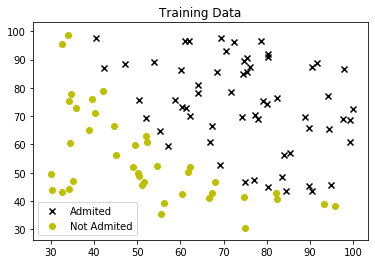

In [53]:
# Plot training data
Data1 = pd.read_csv("data1ex2.txt", header=None, names=['Exam1Score','Exam2Score','Label'])

Admitted = Data1.loc[Data1['Label']==1].copy()
NotAdmitted = Data1.loc[Data1['Label']==0].copy()

plt.scatter(Admitted[['Exam1Score']],Admitted[['Exam2Score']],c='k',label='Admited',marker='x')
plt.scatter(NotAdmitted[['Exam1Score']],NotAdmitted[['Exam2Score']],c='y',label='Not Admited')
plt.title('Training Data')
plt.legend()
plt.show()


Implementing the cost function for logistic regression

The hypothesis of logistic regression is
$$h_\theta = g(\theta^Tx) $$
where $g$ is the sigmoid function defined below
$$g(z) = \frac{1}{1+e^{-z}}$$

The cost function in compact form is given by
$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m}[-y^{(i)}log(h_\theta(x^{(i)})) - (1 - y^{(i)})log(1- h_\theta(x^{(i)})) ] $$

In the vectorized form the cost function becomes:

$$h = g(\theta^Tx) $$

$$J(\theta) = \frac{1}{m} -y^Tlog(h) - (1 - y)^Tlog(1- h) $$



In [ ]:
# Implementing Cost Function and Gradient to be used with scipy.optimize
def LogisticCostFunction(theta,Y,X):
    # Cost function for logistic Regression
    m = Y.size
    h = sigmoid(X @ theta)
    J = -(1/m)*(Y.T@np.log(h) + (1-Y).T@np.log(1-h))
    return J

The gradient for the objective function is 
$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$.

or in vector form

$$ \nabla J(\theta) = \frac{1}{m}X^T(h-y) $$ 

In [ ]:
def LogisticRegrGradient(theta,Y,X):
    # Gradient
    m = Y.size
    h = sigmoid(X @ theta)
    G = (1/m)*(X.T@(h-Y))
    return G.flatten()

In [78]:
Dataxnp = Data1[['Exam1Score','Exam2Score']]
Dataxnp.insert(0, 'Ones', 1.0)
X = Dataxnp.to_numpy()
Y = Data1['Label'].to_numpy()
m,n = X.shape

#Testing the Cost Function Value and Gradient
theta = 0*np.ones((n))

print('Testing the Cost Funtion (for Theta (0,0,0) should return 0.693)',LogisticCostFunction(theta,Y,X))
print('Testing Gradient...expected [-0.100, -12.009, -11.263]',)
print(LogisticRegrGradient(theta,Y,X))


#The Value of 0.693 is obtained.

Testing the Cost Funtion (for Theta (0,0,0) should return 0.693) 0.6931471805599452
Testing Gradient...expected [-0.100, -12.009, -11.263]
[ -0.1        -12.00921659 -11.26284221]


Now let's proceed to find the values of theta. Instead of gradient descent
I decided to use the BFGS method, that is on the scipy.optimize package

In [75]:
res = minimize(LogisticCostFunction, theta, args=(Y,X), method='BFGS', jac=LogisticRegrGradient,options={'disp': True,'gtol': 1e-08,'maxiter':400})
print('Theta * values:',res.x)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 25
         Function evaluations: 33
         Gradient evaluations: 33
Theta values: [-25.16133357   0.20623171   0.2014716 ]


C:\Users\felip\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
C:\Users\felip\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in matmul
  if sys.path[0] == '':


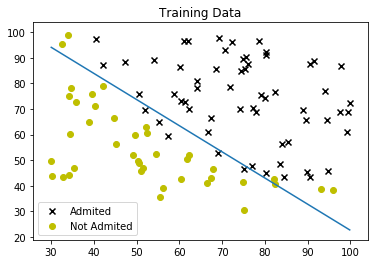

In [88]:
# Plot the Data with decision boundary
xnew = np.linspace(Data1['Exam1Score'].min(),Data1['Exam1Score'].max())
ynew = -(1/res.x[2])*(res.x[0] + res.x[1]*xnew)

plt.plot(xnew,ynew)
plt.scatter(Admitted[['Exam1Score']],Admitted[['Exam2Score']],c='k',label='Admited',marker='x')
plt.scatter(NotAdmitted[['Exam1Score']],NotAdmitted[['Exam2Score']],c='y',label='Not Admited')
plt.title('Training Data and decision boundaries')
plt.legend()
plt.show()

In [101]:
# Create a function to predict values.

def Predict(theta,x,y):
    xn = np.array([1, x, y])
    h = sigmoid(theta.T@xn)
    if h>=0.5:
        c = 1
    if h<0.5:
        c= 0
    return c,h

classif,probability = Predict(res.x,45.,85.)
print('The class is:',classif)
print('Probability:',probability)

The class is: 1
Probability: 0.7762906908226817
